In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
from cvx_synth_asset_oracle import ConvexSynthAssetOracleLite

In [3]:
save_file_dir = "../data/cvxcrv_pool_data.csv"
pool_data = pd.DataFrame()
if os.path.exists(save_file_dir):
    pool_data = pd.read_csv(save_file_dir)
pool_data

,block,crvusd_price,ethusd_price,cvxcrv_crv_1,cvxcrv_crv_10,cvxcrv_crv_100,cvxcrv_crv_1000,cvxcrv_crv_10000,cvxcrv_pool_balance,crv_pool_balance
0,13056869,2.070921,3066.626358,0.996924,9.132532,10.082833,10.084830,10.084850,9.900095e+00,1.010000e+01
1,13056984,2.052405,3041.060346,0.994729,9.947286,99.472498,994.688360,9943.196023,5.520935e+05,4.564644e+05
2,13058684,2.121912,3175.374060,0.996586,9.965855,99.658231,996.550167,9962.276366,5.812792e+05,5.272852e+05
3,13058701,2.121912,3175.374060,0.995442,9.954414,99.543810,995.405334,9950.759193,5.971679e+05,5.114479e+05
4,13058709,2.121912,3175.374060,0.991493,9.914924,99.148867,991.451563,9910.763473,6.485631e+05,4.603481e+05
...,...,...,...,...,...,...,...,...,...,...
26218,14061352,3.071517,2522.084130,0.950490,9.504899,95.048955,950.485643,9504.465075,4.081266e+07,1.090499e+07
26219,14061355,3.071517,2522.084130,0.950430,9.504301,95.042975,950.425835,9503.866384,4.081954e+07,1.089845e+07
26220,14061360,3.071517,2522.084130,0.950403,9.504030,95.040257,950.398647,9503.594233,4.082266e+07,1.089547e+07
26221,14061528,3.071517,2525.269977,0.950403,9.504030,95.040258,950.398656,9503.594324,4.082266e+07,1.089547e+07


In [4]:
cvxcrv_oracle = ConvexSynthAssetOracleLite()
print(f"Initial EMA Swap Rate: {cvxcrv_oracle.ema_swap_rate}")

verbose = False

pool_data['ema_swap_rate'] = 0
pool_data['swap_rate'] = 0
pool_data['crvusd_chainlink_price'] = 0
pool_data['cvxcrvusd_spot_price'] = 0
pool_data['cvxcrvusd_oracle_price'] = 0

for idx, row in pool_data.iterrows():

    cvxcrv_to_crv_rate = row.cvxcrv_crv_10000 / 1E4
    chainlink_crvusd_price = row.crvusd_price
    cvxcrv_oracle.update_ema_rate(int(cvxcrv_to_crv_rate * 1e18))

    cvxcrv_usd_oracle_price = cvxcrv_oracle.latestAnswer(int(chainlink_crvusd_price * 1E8))  # need to multiply to get 8 decimal precision int

    pool_data.loc[idx, 'ema_swap_rate'] = cvxcrv_oracle.ema_swap_rate * 1e-18
    pool_data.loc[idx, 'crvusd_chainlink_price'] = chainlink_crvusd_price
    pool_data.loc[idx, 'cvxcrvusd_oracle_price'] = cvxcrv_usd_oracle_price * 1e-18
    pool_data.loc[idx, 'cvxcrvusd_spot_price'] = cvxcrv_to_crv_rate * chainlink_crvusd_price
    pool_data.loc[idx, 'swap_rate'] = cvxcrv_to_crv_rate

    if verbose:
        print(f"Received {row.cvxcrv_crv_10000} CRV for 10000 cvxCRV.")
        print(f"EMA Swap Rate: {cvxcrv_oracle.ema_swap_rate * 1e-18}")
        print(f"CRVUSD Chainlink Price: {chainlink_crvusd_price} USD")
        print(f"cvxCRVUSD Chainlink Price: {cvxcrv_usd_oracle_price * 1e-18} USD")

        print()

Initial EMA Swap Rate: 0


In [5]:
pool_data['peg_ratio'] = pool_data.crv_pool_balance / pool_data.cvxcrv_pool_balance
pool_data

,block,crvusd_price,ethusd_price,cvxcrv_crv_1,cvxcrv_crv_10,cvxcrv_crv_100,cvxcrv_crv_1000,cvxcrv_crv_10000,cvxcrv_pool_balance,crv_pool_balance,ema_swap_rate,swap_rate,crvusd_chainlink_price,cvxcrvusd_spot_price,cvxcrvusd_oracle_price,peg_ratio
0,13056869,2.070921,3066.626358,0.996924,9.132532,10.082833,10.084830,10.084850,9.900095e+00,1.010000e+01,0.001008,0.001008,2.070921,0.002088,0.002088,1.020192
1,13056984,2.052405,3041.060346,0.994729,9.947286,99.472498,994.688360,9943.196023,5.520935e+05,4.564644e+05,0.497664,0.994320,2.052405,2.040747,1.021408,0.826788
2,13058684,2.121912,3175.374060,0.996586,9.965855,99.658231,996.550167,9962.276366,5.812792e+05,5.272852e+05,0.663852,0.996228,2.121912,2.113907,1.408635,0.907112
3,13058701,2.121912,3175.374060,0.995442,9.954414,99.543810,995.405334,9950.759193,5.971679e+05,5.114479e+05,0.746658,0.995076,2.121912,2.111463,1.584342,0.856456
4,13058709,2.121912,3175.374060,0.991493,9.914924,99.148867,991.451563,9910.763473,6.485631e+05,4.603481e+05,0.795542,0.991076,2.121912,2.102976,1.688069,0.709797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26218,14061352,3.071517,2522.084130,0.950490,9.504899,95.048955,950.485643,9504.465075,4.081266e+07,1.090499e+07,0.976195,0.950447,3.071517,2.919313,2.998401,0.267196
26219,14061355,3.071517,2522.084130,0.950430,9.504301,95.042975,950.425835,9503.866384,4.081954e+07,1.089845e+07,0.976194,0.950387,3.071517,2.919129,2.998398,0.266991
26220,14061360,3.071517,2522.084130,0.950403,9.504030,95.040257,950.398647,9503.594233,4.082266e+07,1.089547e+07,0.976193,0.950359,3.071517,2.919046,2.998395,0.266898
26221,14061528,3.071517,2525.269977,0.950403,9.504030,95.040258,950.398656,9503.594324,4.082266e+07,1.089547e+07,0.976192,0.950359,3.071517,2.919046,2.998392,0.266898


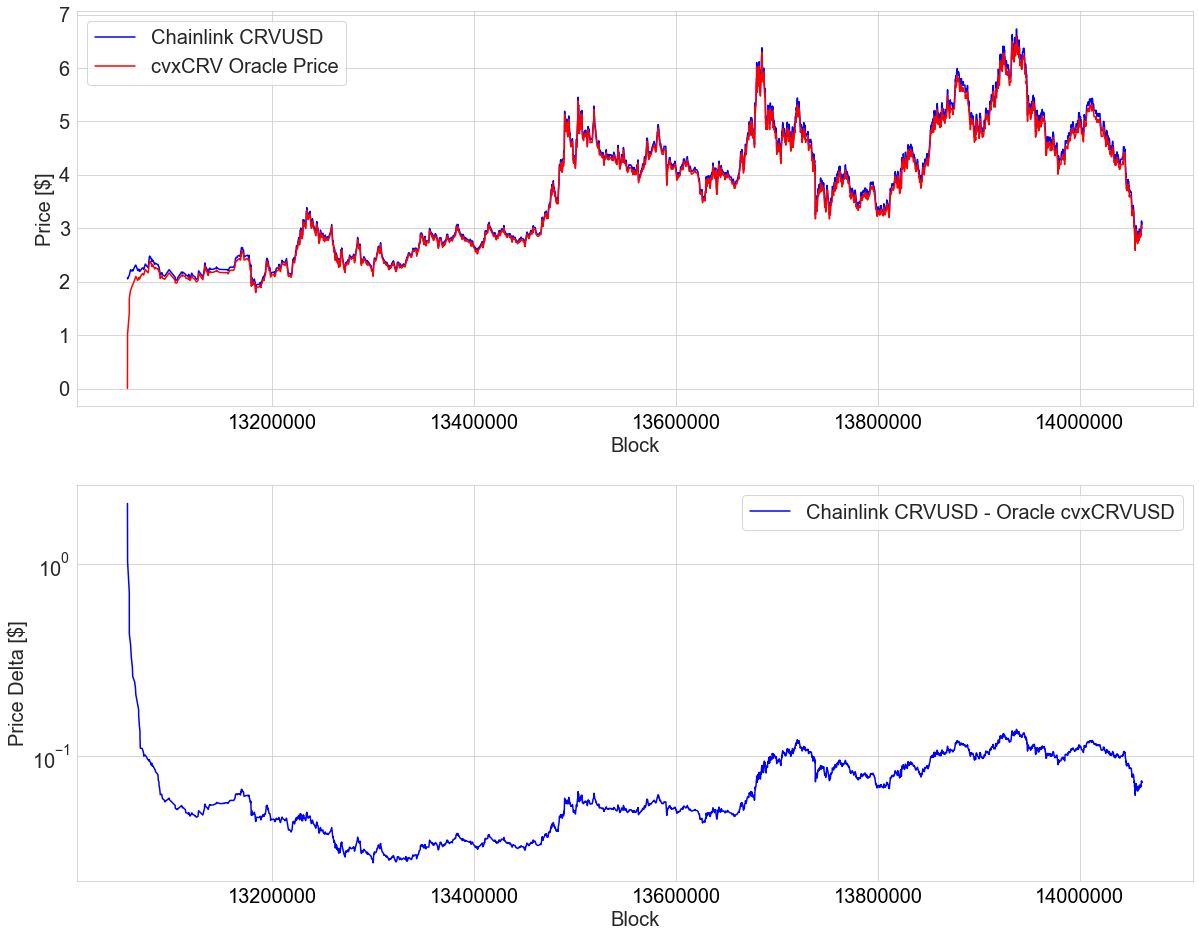

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(20, 16))

ax = axes[0]
ax.plot(
    pool_data.block,
    pool_data.crvusd_chainlink_price,
    color='blue',
    # lw=5,
    label='Chainlink CRVUSD'
)
ax.plot(
    pool_data.block,
    pool_data.cvxcrvusd_oracle_price,
    color='red',
    label='cvxCRV Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)


ax = axes[1]
ax.plot(
    pool_data.block,
    pool_data.crvusd_chainlink_price - pool_data.cvxcrvusd_oracle_price,
    color='blue',
    # lw=5,
    label='Chainlink CRVUSD - Oracle cvxCRVUSD'
)

ax.set_yscale('log')

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price Delta [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

There's an oracle warm-up period, during which the oracle price becomes more robust against spot as the oracle updates average up the EMA swap rate. How long that lasts gives an idea on how reflexive the oracle price is (in a way):

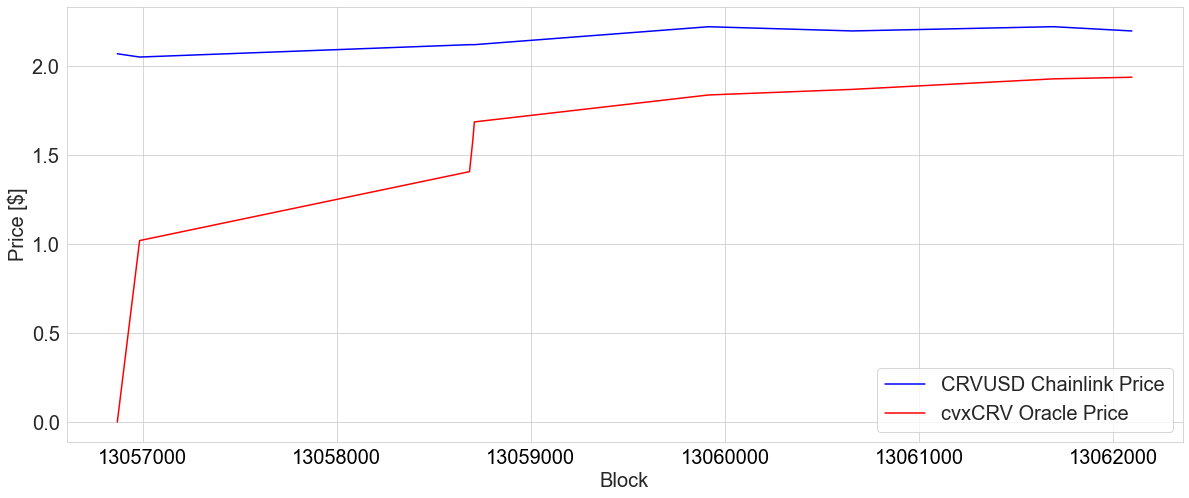

In [7]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

oracle_warmup_data = pool_data[pool_data.block < 13063000]

ax.plot(
    oracle_warmup_data.block,
    oracle_warmup_data.crvusd_chainlink_price,
    color='blue',
    label='CRVUSD Chainlink Price'
)
ax.plot(
    oracle_warmup_data.block,
    oracle_warmup_data.cvxcrvusd_oracle_price,
    color='red',
    label='cvxCRV Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

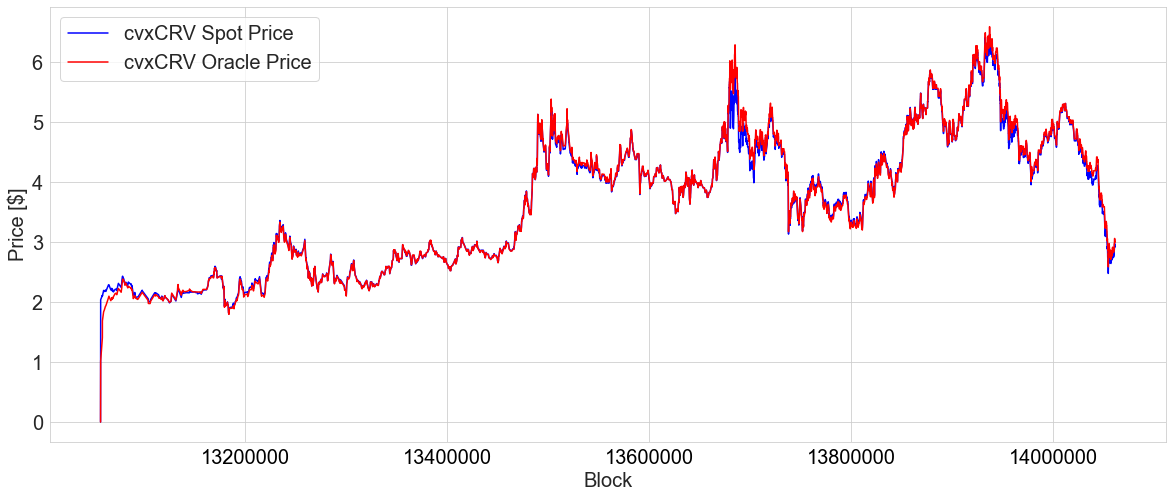

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    pool_data.block,
    pool_data.cvxcrvusd_spot_price,
    color='blue',
    # lw=5,
    label='cvxCRV Spot Price'
)
ax.plot(
    pool_data.block,
    pool_data.cvxcrvusd_oracle_price,
    color='red',
    label='cvxCRV Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

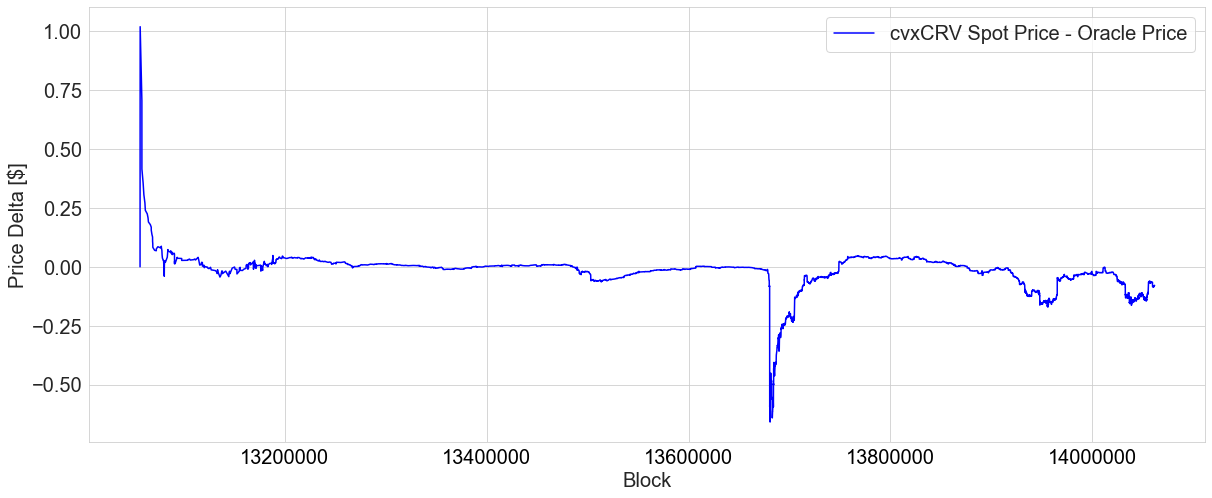

In [9]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    pool_data.block,
    pool_data.cvxcrvusd_spot_price - pool_data.cvxcrvusd_oracle_price,
    color='blue',
    # lw=5,
    label='cvxCRV Spot Price - Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price Delta [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)

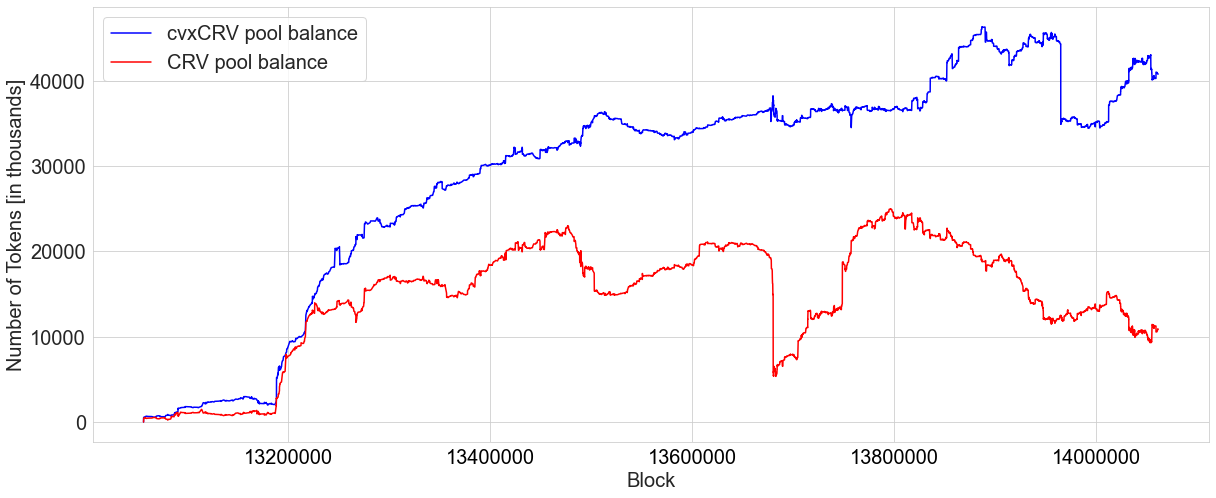

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

ax.plot(
    pool_data.block,
    pool_data.cvxcrv_pool_balance * 1e-3,
    color='blue',
    # lw=5,
    label='cvxCRV pool balance'
)
ax.plot(
    pool_data.block,
    pool_data.crv_pool_balance * 1E-3,
    color='red',
    label='CRV pool balance'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in thousands]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

Zooming pool de-peg incident around 13700000 block number.

In [11]:
df_pool_data_snippet = pool_data[(pool_data.block > 13675000) & (pool_data.block < 13725000)]

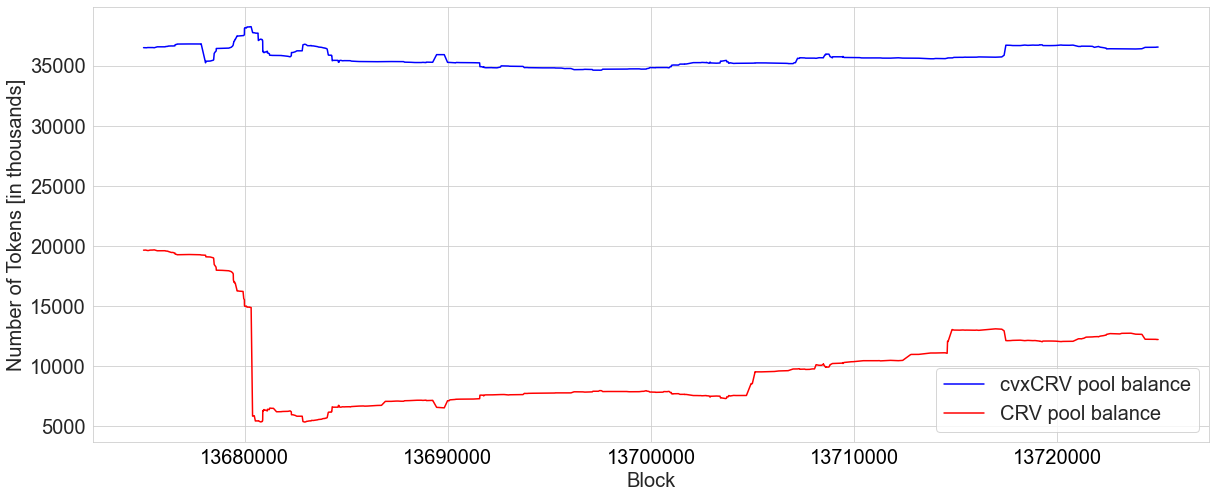

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrv_pool_balance * 1e-3,
    color='blue',
    # lw=5,
    label='cvxCRV pool balance'
)
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.crv_pool_balance * 1E-3,
    color='red',
    label='CRV pool balance'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in thousands]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

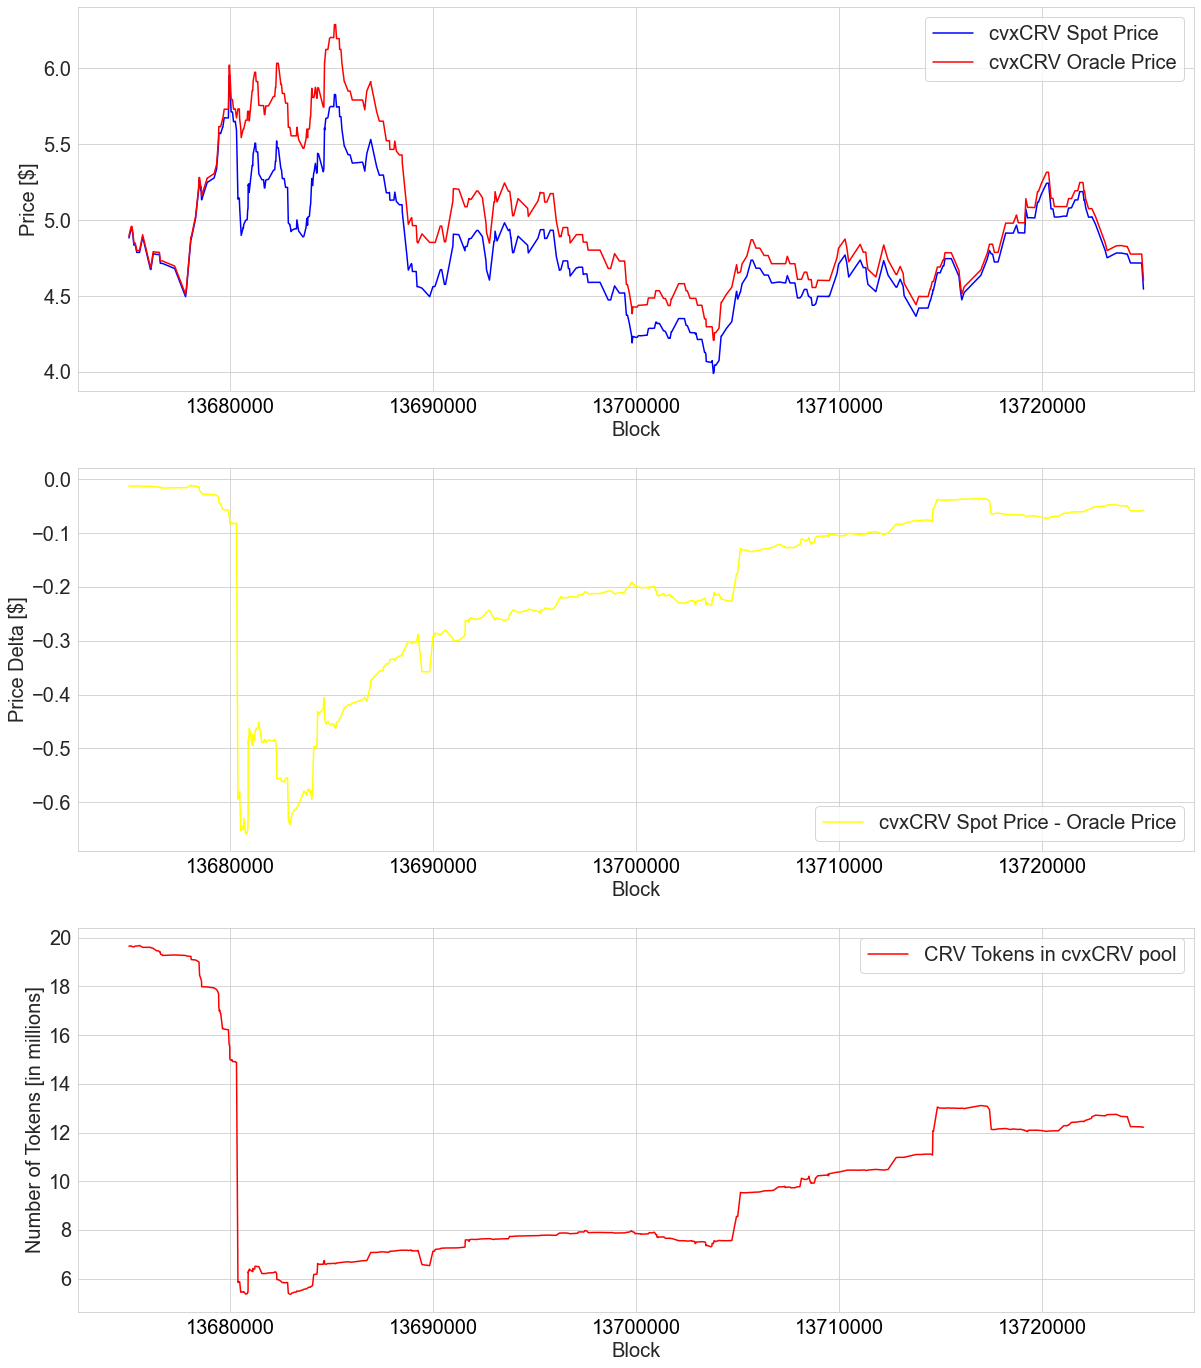

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(20, 24))

df_pool_data_snippet = pool_data[(pool_data.block > 13675000) & (pool_data.block < 13725000)]

ax = axes[0]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrvusd_spot_price,
    color='blue',
    # lw=5,
    label='cvxCRV Spot Price'
)
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrvusd_oracle_price,
    color='red',
    label='cvxCRV Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)


ax = axes[1]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.cvxcrvusd_spot_price - df_pool_data_snippet.cvxcrvusd_oracle_price,
    color='yellow',
    # lw=5,
    label='cvxCRV Spot Price - Oracle Price'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Price Delta [$]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)


ax = axes[2]
ax.plot(
    df_pool_data_snippet.block,
    df_pool_data_snippet.crv_pool_balance * 1e-6,
    color='red',
    # lw=5,
    label='CRV Tokens in cvxCRV pool'
)

ax.set_xlabel("Block", fontsize=20)
ax.set_ylabel("Number of Tokens [in millions]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black')
ax.legend(fontsize=20)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)